# Scaling up to $n$ emitters

Taking the core circuit for two emitters as a starting point, we can construct the circuit for $n$ emitters by considering two key points: 

### Commutation of Paulis in the interaction Hamiltonian.

The obvious extension of the interaction layer in the Hamiltonian would be a ladder-like stacking. For example, for $n = 4$ 

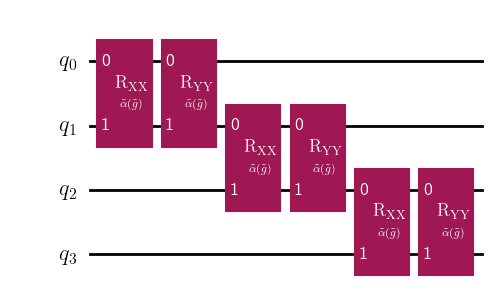

<Figure size 640x480 with 0 Axes>

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

system = QuantumRegister(4, 'q')
qc = QuantumCircuit(system)
tilde_alpha = Parameter('$\\tilde{\\alpha} (\\tilde{g})$')


for i in range(0,3):

    qc.rxx(tilde_alpha, system[i], system[i+1])
    qc.ryy(tilde_alpha, system[i], system[i+1])

a = qc.draw('mpl')
plt.savefig('figures/ladder_like_stacking')
a

However, if we consider the expression for the interaction Hamiltonian,

$$
\begin{align}
H_I = H_I^{(01)} + H_I^{(12)} + H_I^{(23)} = \tilde{g} \left[ (\sigma_0^{\dag} \sigma_1^{\dag} + \sigma_0 \sigma_1^{\dag}) + (\sigma_1^{\dag} \sigma_2^{\dag} + \sigma_1 \sigma_2^{\dag}) + (\sigma_2^{\dag} \sigma_3^{\dag} + \sigma_2 \sigma_3^{\dag}) \right]
\end{align}

We see that even though $H_I^{(01)}$ does not commute with $H^{(12)}$, it does with $H_I^{(23)}$, suggesting that we can divide $U_{I} (t) = e^{-iH_It}$ into two layers, each one containing commuting terms:

$$
\begin{align}
U_I(t) \approx U_1 (t) U_2(t) = \left( e^{-it(H_I^{(01)} + H_I^{(23)})} \right) e^{-itH_I^{(12)}}
\end{align}

Notice how this is still approximate since the first layer does not commute with the second but now the exponential in each layer $U_i$ is exactly separable, so we have no Trotterization error inside a layer. Additionally, this exact separation allows us to perform operations in parallel instead of starwise

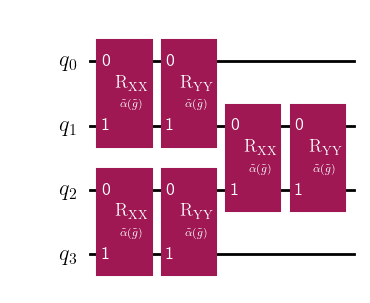

<Figure size 640x480 with 0 Axes>

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

system = QuantumRegister(4, 'q')
qc = QuantumCircuit(system)
tilde_alpha = Parameter('$\\tilde{\\alpha} (\\tilde{g})$')


for i in range(0,3,2):

    qc.rxx(tilde_alpha, system[i], system[i+1])
    qc.ryy(tilde_alpha, system[i], system[i+1])

for i in range(1,3,2):

    qc.rxx(tilde_alpha, system[i], system[i+1])
    qc.ryy(tilde_alpha, system[i], system[i+1])

a = qc.draw('mpl')
plt.savefig('figures/layering_of_h_int')
a

### Partial diagonalization. Approximate basis change.

Apart from layering $H_{int}$, we would like to layer the basis change since computing the exact basis change matrix for large $n$ is classically intractable. For $n = 3$, this means assuming that the basis change operator $P'$ can be factorized using just tensor products of $P$ with the identity. In particular,

$$
\begin{align}
P' \approx P_{01} \cdot P_{12} \equiv (P \otimes \mathbf{1}_2) \cdot (\mathbf{1}_0 \otimes P)
\end{align}

With our choice of $P = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & -1/\sqrt{2} & 1/\sqrt{2} & 0 \\ 0 & 1/\sqrt{2} & 1/\sqrt{2} & 0 \\ 0 & 0 & 0 & 1  \end{pmatrix} $, we can construct the $P'$ and obtain the approximately diagonal form of $H$ as a way to check the validity of this approximation.

$$
\begin{align}
H' \equiv P'^{\dag} H P' = \begin{pmatrix} 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & - \tilde{g} + \tilde{\omega} & 0 & - \frac{\tilde{g}}{2} & 0 & \frac{\tilde{g}}{2} & 0 & 0\\
0 & 0 & \frac{\tilde{g}}{2} + \frac{3 \tilde{\omega}}{2} & 0 & - \frac{\tilde{g}}{2} + \frac{\tilde{\omega}}{2} & - \frac{\sqrt{2} \tilde{g}}{2} & \frac{\tilde{g}}{2} & 0\\
0 & - \frac{\tilde{g}}{2} & 0 & - \frac{\tilde{g}}{2} + \frac{3 \tilde{\omega}}{2} & - \frac{\sqrt{2} \tilde{g}}{2} & - \frac{\tilde{g}}{2} + \frac{\tilde{\omega}}{2} & 0 & 0\\
0 & 0 & - \frac{\tilde{g}}{2} + \frac{\tilde{\omega}}{2} & - \frac{\sqrt{2} \tilde{g}}{2} & \frac{\tilde{g}}{2} + \frac{3 \tilde{\omega}}{2} & 0 & \frac{\tilde{g}}{2} & 0\\
0 & \frac{\tilde{g}}{2} & - \frac{\sqrt{2} \tilde{g}}{2} & - \frac{\tilde{g}}{2} + \frac{\tilde{\omega}}{2} & 0 & - \frac{\tilde{g}}{2} + \frac{3 \tilde{\omega}}{2} & 0 & 0\\
0 & 0 & \frac{\tilde{g}}{2} & 0 & \frac{\tilde{g}}{2} & 0 & \tilde{g} + 2 \tilde{\omega} & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 3 \tilde{\omega}
\end{pmatrix}
\end{align}

The resulting matrix is strongly diagonally dominant for our values of $\tilde{\omega}$ and $\tilde{g}$ since, for every $i$, $|h'_{ii}| > \sum_{j \neq i} |h'_{ij}|$. For example, for $\omega = 1.2$, $\omega_c = 1.1$, $\kappa = 0.2$, $g = 0.01$, $\gamma = 0.8 \cdot 10^{-6}$.

$$
H' = \begin{pmatrix}0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 1.2 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1.801 & 0 & 0.6 & 0 & 0 & 0\\0 & 0 & 0 & 1.8 & 0 & 0.6 & 0 & 0\\0 & 0 & 0.6 & 0 & 1.801 & 0 & 0 & 0\\0 & 0 & 0 & 0.6 & 0 & 1.8 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 2.402 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 3.602\end{pmatrix}

~~Finally, this partial diagonalization is expected to work best, the smaller $\left| -\frac{\tilde{g}}{2} + \frac{\tilde{\omega}}{2} \right|$ is. For a given $\tilde{g}$, increasing the effective frequency worsens the basis change.~~ The Frobenius norm is almost the same for increasing $\tilde{\omega}$ since the diagonal elements are changing too.

Taking these two things into account, the generalization is straightforward and the function creating the circuit is `efficient_circuit_markovian_CHAIN` and the one that solves it is `efficient_qiskit_solver_markovian_CHAIN`, both of which can be found in the folder `main_functions`. For $n=6$, the circuit would be the following:

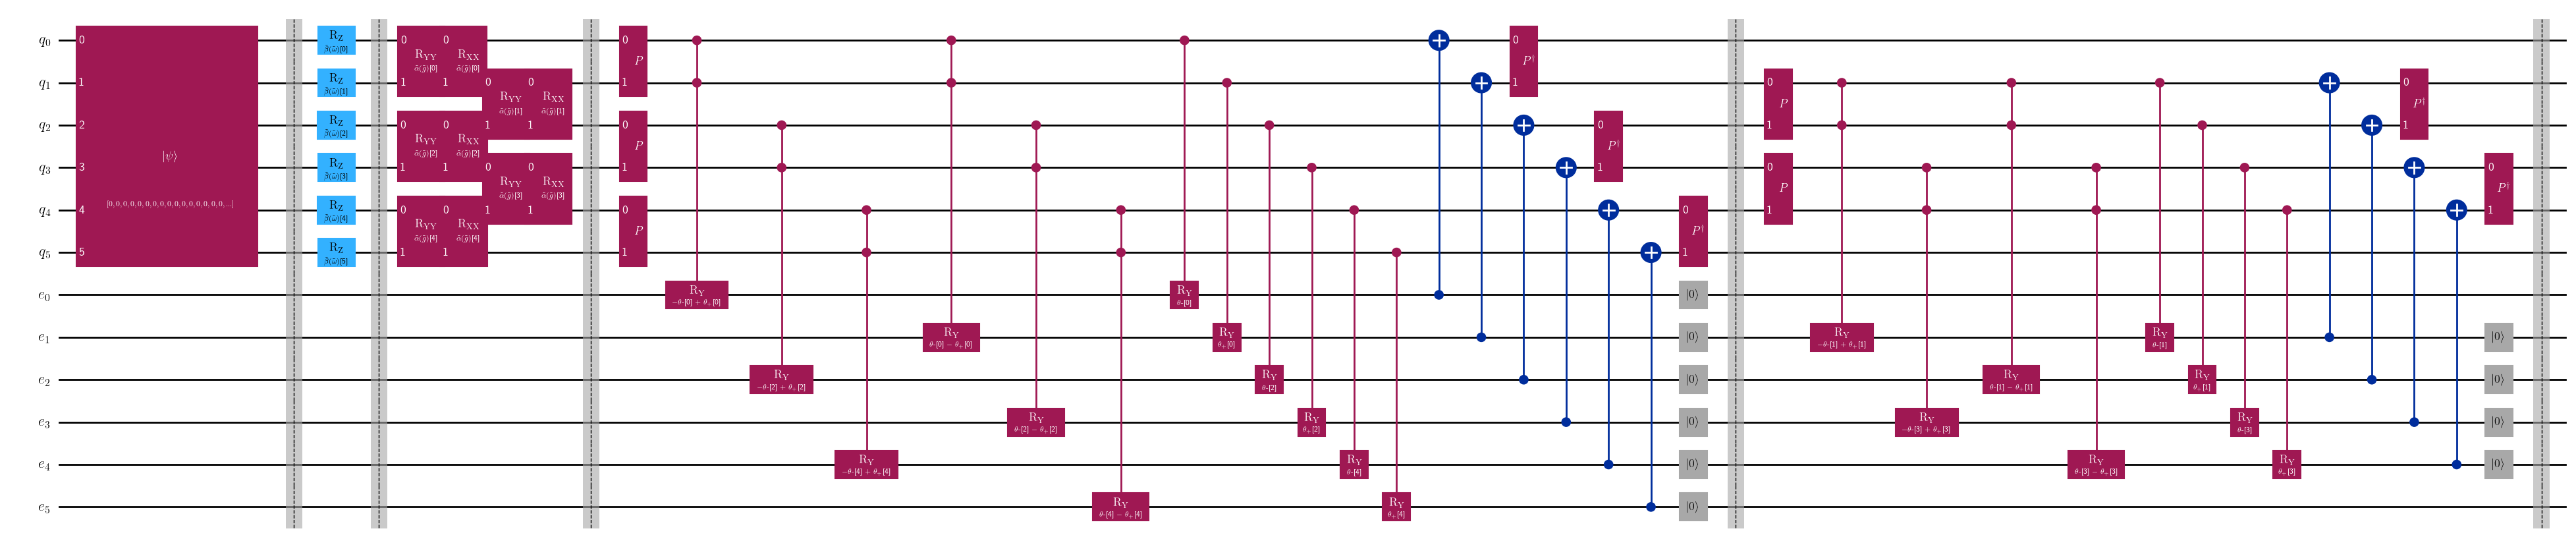

In [3]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter, ControlledGate, Gate, ParameterVector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

n = 6
initial_state = [0]*(2**n)
initial_state[-1] = 1

system = QuantumRegister(n, name = 'q')
environment = QuantumRegister(n, name = 'e')

tilde_alpha = ParameterVector('$\\tilde{\\alpha} (\\tilde{g})$', n-1)
tilde_beta = ParameterVector('$\\tilde{\\beta} (\\tilde{\\omega})$', n)
theta_plus = ParameterVector('$\\theta_{+} $', n-1)
theta_minus = ParameterVector('$\\theta- $', n-1)

# Initialization

init = QuantumCircuit(system, environment)
initial_statevector = Statevector(initial_state) 
init.initialize(params = initial_statevector, qubits = system, normalize = True)

init.barrier()

# Free evolution

u_0 = QuantumCircuit(system, environment)

for i in range(n):

    u_0.rz(tilde_beta[i], system[i])

u_0.barrier()

# Interaction layer

u1 = QuantumCircuit(system, environment)

for j in range(0, n-1, 2):

    u1.ryy(tilde_alpha[j], qubit1 = system[j], qubit2 = system[j+1])
    u1.rxx(tilde_alpha[j], qubit1 = system[j], qubit2 = system[j+1])

if n > 2:

    u2 = QuantumCircuit(system, environment)

    for k in range(1, n-1, 2):

        u2.ryy(tilde_alpha[k], qubit1 = system[k], qubit2 = system[k+1])
        u2.rxx(tilde_alpha[k], qubit1 = system[k], qubit2 = system[k+1])

    u_int = u1.compose(u2)

else:

    u_int = u1

u_int.barrier()

# Decay

u_decay = QuantumCircuit(system, environment)

u_decay_first_layer = QuantumCircuit(system, environment)

P_gate = Gate(name = 'P', params = [],num_qubits = 2, label = '$P$')

P_dag_gate = Gate(name = 'Pdag', params = [], num_qubits = 2, label = '$P^{\\dag}$')

#ccry_plus = ControlledGate(name = 'ryplus', num_qubits = 3, params = [theta_plus[j] - theta_minus[j]], num_ctrl_qubits= 2, base_gate = RYGate(theta_plus - theta_minus))

#ccry_minus = ControlledGate(name = 'ryminus', num_qubits = 3, params = [theta_minus[j] - theta_plus[j]], num_ctrl_qubits= 2, base_gate = RYGate(theta_minus - theta_plus))

for j in range(0, n-1, 2):

        u_decay_first_layer.append(P_gate, [system[j], system[j+1]])

        ccry_plus = RYGate(theta_plus[j] - theta_minus[j]).control(2)

        ccry_minus = RYGate(theta_minus[j] - theta_plus[j]).control(2)

        u_decay_first_layer.append(ccry_plus, [system[j], system[j+1], environment[j]])

        u_decay_first_layer.append(ccry_minus, [system[j], system[j+1], environment[j+1]])

        u_decay_first_layer.cry(theta_minus[j], system[j], environment[j])

        u_decay_first_layer.cry(theta_plus[j], system[j+1], environment[j+1])

        u_decay_first_layer.cx(environment[j], system[j])

        u_decay_first_layer.cx(environment[j+1], system[j+1])

        u_decay_first_layer.append(P_dag_gate, [system[j], system[j+1]])

        u_decay_first_layer.reset([environment[j], environment[j+1]])
    
    # And onto the second layer
u_decay_first_layer.barrier()

if n > 2:

    u_decay_second_layer = QuantumCircuit(system, environment)

    for j in range(1, n-1, 2):

        u_decay_first_layer.append(P_gate, [system[j], system[j+1]])

        ccry_plus = RYGate(theta_plus[j] - theta_minus[j]).control(2)

        ccry_minus = RYGate(theta_minus[j] - theta_plus[j]).control(2)

        u_decay_second_layer.append(ccry_plus, [system[j], system[j+1], environment[j]])

        u_decay_second_layer.append(ccry_minus, [system[j], system[j+1], environment[j+1]])

        u_decay_second_layer.cry(theta_minus[j], system[j], environment[j])

        u_decay_second_layer.cry(theta_plus[j], system[j+1], environment[j+1])

        u_decay_second_layer.cx(environment[j], system[j])

        u_decay_second_layer.cx(environment[j+1], system[j+1])

        u_decay_second_layer.append(P_dag_gate, [system[j], system[j+1]])

        u_decay_second_layer.reset([environment[j], environment[j+1]])

    u_decay = u_decay_first_layer.compose(u_decay_second_layer)

else:

    u_decay = u_decay_first_layer

u_decay.barrier()

u = init.compose(u_0).compose(u_int).compose(u_decay)

a = u.draw('mpl', fold = 70)
a.savefig('figures/first_n_emitters_generalization')
a

For the moment, the only thing left is to check that this circuit indeed yields accurate results for the population dynamics of the emitters.

In [ ]:
from main_functions.merge_methods_CHAIN import solve_master_equation
from main_functions.efficient_qiskit_solver_markovian_CHAIN import markovian_qiskit_solver
from qiskit_aer import AerSimulator
import numpy as np

omega_c = 1.1
kappa = [0.2]

t = np.linspace(0, 750, 150)

r = 5
backend = AerSimulator()
optimization_level = 0
options = {'resilience_level' : 1,
           'default_shots' : 10**3,
           'optimization_level' : 1}

n_molecules = [6]

qc_populations = {}
qutip_populations = {}

for i in n_molecules:

    omega_m = [1.1]*i
    g = [0.01]*(2*(i-1))
    gamma = [0.8*(10**-6)]*i
    initial_state = [0]*(2**i)
    initial_state[-1] = 1

    evs_markov = solve_master_equation(i, omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')
    evs_qc = markovian_qiskit_solver(i, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options)

    qc_populations['n = %s' %i] = evs_qc
    qutip_populations['n = %s' %i] = evs_markov

    print('n = %s finished!' %i)

#np.savez('qc_populations', qc_populations)
#np.savez('markovian_populations', qutip_populations)

markovian computed


c:\Users\Benjamin\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")
c:\Users\Benjamin\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:234: UserWarning: Options {'transpilation': {'optimization_level': 1}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


qiskit computed
n = 2 finished!


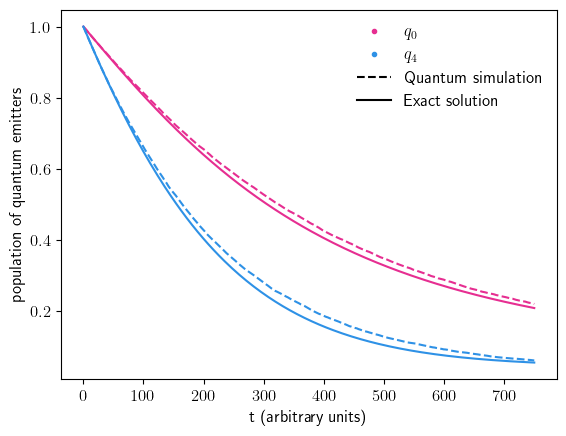

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 12})
from utils.generate_complementary_colors import generate_complementary_colors

qc_data = np.load('data/qc_populations.npz', allow_pickle = True)
qutip_data = np.load('data/markovian_populations.npz', allow_pickle = True)

qc_pops = qc_data['arr_0'].item()
qutip_pops = qutip_data['arr_0'].item()

t = np.linspace(0, 750, 250)

plot_qubits = ['0','4']

for key in qc_pops:

    for qubit in plot_qubits:

        colors = generate_complementary_colors(len(qc_pops[key].keys()), palette_type = 'default', start_color = 'deeppink')

        plt.plot(t, qutip_pops[key][qubit], color = colors[int(qubit)])
        plt.plot(t, qc_pops[key][qubit], color = colors[int(qubit)], linestyle = 'dashed')
        plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = '.', color =  colors[int(qubit)], label = '$q_{%i}$' %int(qubit))

plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', label = 'Quantum simulation')
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'Exact solution')
plt.xlabel('t (arbitrary units)')
plt.ylabel('population of quantum emitters')
#plt.yscale('log')
#plt.title(key)
plt.legend(frameon=False)
#plt.savefig('markovian circuit for %s' %key)
plt.savefig('figures/original_circuit_6_emitters_population_dynamics', bbox_inches='tight')
plt.show()
